# Análisis Exploratorio - Dataset de reviews Olist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# opciones de visualización de pandas
#pd.options.display.max_rows = 50
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Dataset
df = pd.read_csv('./datasets/olist_order_reviews_dataset.csv',)

In [3]:
df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


## Tipo de dato y shape


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [5]:
df.shape

(99224, 7)

Observaciones:
* El dataset cuenta con 99224 registros y 7 campos o columnas
* En cuanto a los tipos de datos son strings excepto la calificación que es de tipo entero. Las columnas _review_creation_date_ y _review_answer_timestamp_ deberían ser de tipo `datetime` para poder hacer un mejor análisis

In [7]:
# Se convierten las columnas mencionadas en formato fecha
import datetime as dt
df['review_creation_date']=pd.to_datetime(df['review_creation_date'],format="%Y-%m-%d %H:%M:%S")
df['review_answer_timestamp']=pd.to_datetime(df['review_answer_timestamp'],format="%Y-%m-%d %H:%M:%S")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Valores nulos y duplicados

**Valores nulos**

In [11]:
df.isna().sum().sort_values()

review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
review_comment_message     58247
review_comment_title       87656
dtype: int64

<AxesSubplot: >

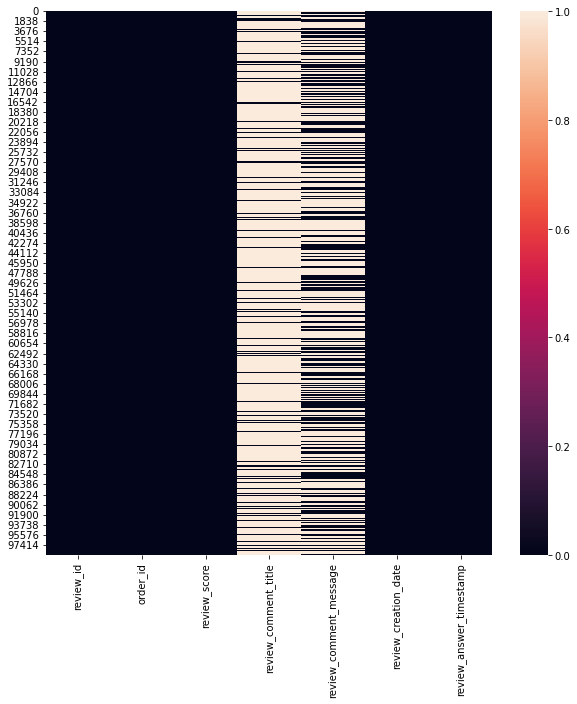

In [12]:
# Gráfica heatmap para ver la distribució de los nulos
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.isna())

In [13]:
# Cantidad de nulos por columna
nulos_titulos = df['review_comment_title'].isna().sum()
nulos_comentarios = df['review_comment_message'].isna().sum()

In [14]:
# Porcentaje de nulos por columna
print(f'Porcentaje de nulos en títulos: {round(nulos_titulos/df.shape[0]*100,2)} %')
print(f'Porcentaje de nulos en comentarios: {round(nulos_comentarios/df.shape[0]*100,2)} %')

Porcentaje de nulos en títulos: 88.34 %
Porcentaje de nulos en comentarios: 58.7 %


**Duplicados**

In [15]:
# Cuenta de Registros duplicados totales
registros_duplicados = df.duplicated().sum()
registros_duplicados

0

In [16]:
# Cuenta de duplicados por zipcode
reviewid_duplicados = df.duplicated(subset=['review_id']).sum()
reviewid_duplicados

814

In [17]:
# Porcentaje de duplicados en review Id
print(f'Porcentaje de nulos en review id: {round(reviewid_duplicados/df.shape[0]*100,2)} %')

Porcentaje de nulos en review id: 0.82 %


## Análisis de variables

#### review_score

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df['review_comment_title'])